In [1]:
# Đọc dữ liệu.
data <- read.csv('Dataset/ageinc_g.csv')
data <- data[,-1]

In [2]:
# In thông tin dữ liệu: head(), số dòng, số cột, summary().
head(data)

,income,age,gender
,<int>,<int>,<chr>
1,101743,58,Female
2,49597,27,Female
3,36517,52,Male
4,33223,49,Male
5,72994,53,Female
6,38361,26,Female


In [3]:
tail(data)

,income,age,gender
,<int>,<int>,<chr>
995,44937,54,Female
996,70615,29,Female
997,95102,41,Female
998,42203,35,Male
999,16975,31,Female
1000,123857,44,Male


In [4]:
str(data)

'data.frame':	1000 obs. of  3 variables:
 $ income: int  101743 49597 36517 33223 72994 38361 48579 115248 11527 54096 ...
 $ age   : int  58 27 52 49 53 26 29 24 31 51 ...
 $ gender: chr  "Female" "Female" "Male" "Male" ...


In [5]:
summary(data)

     income            age           gender         
 Min.   :     0   Min.   :18.00   Length:1000       
 1st Qu.: 46402   1st Qu.:30.00   Class :character  
 Median : 78994   Median :39.00   Mode  :character  
 Mean   : 80117   Mean   :39.41                     
 3rd Qu.:114811   3rd Qu.:49.00                     
 Max.   :179294   Max.   :63.00                     

In [6]:
print(paste('cols:', ncol(data)))
print(paste('rows:', nrow(data)))

[1] "cols: 3"
[1] "rows: 1000"


In [7]:
any(is.na(data))

[1] FALSE

- any(is.na(data))

In [8]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


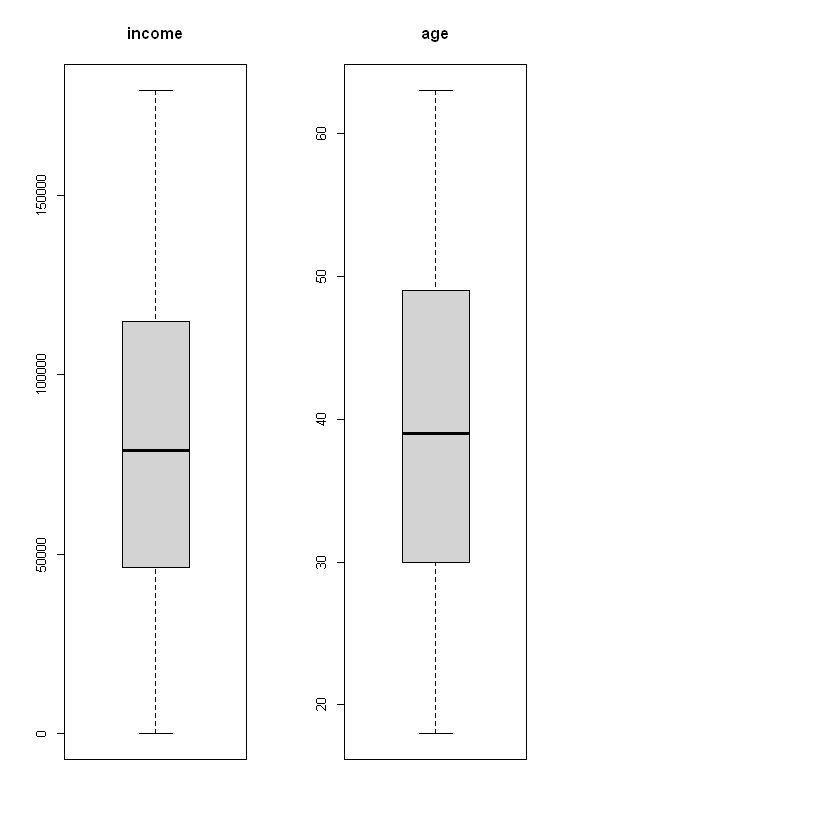

In [9]:
# Kiểm tra và xử lý outliers
par(mfrow = c(1,3)) # divide graph area in 3 columns
boxplot(data$income, main = 'income')
boxplot(data$age, main = 'age')

- Nhận xét: dữ liệu không có giá trị outliers

In [10]:
library(clue)
library(factoextra)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



[1] 0.004331026

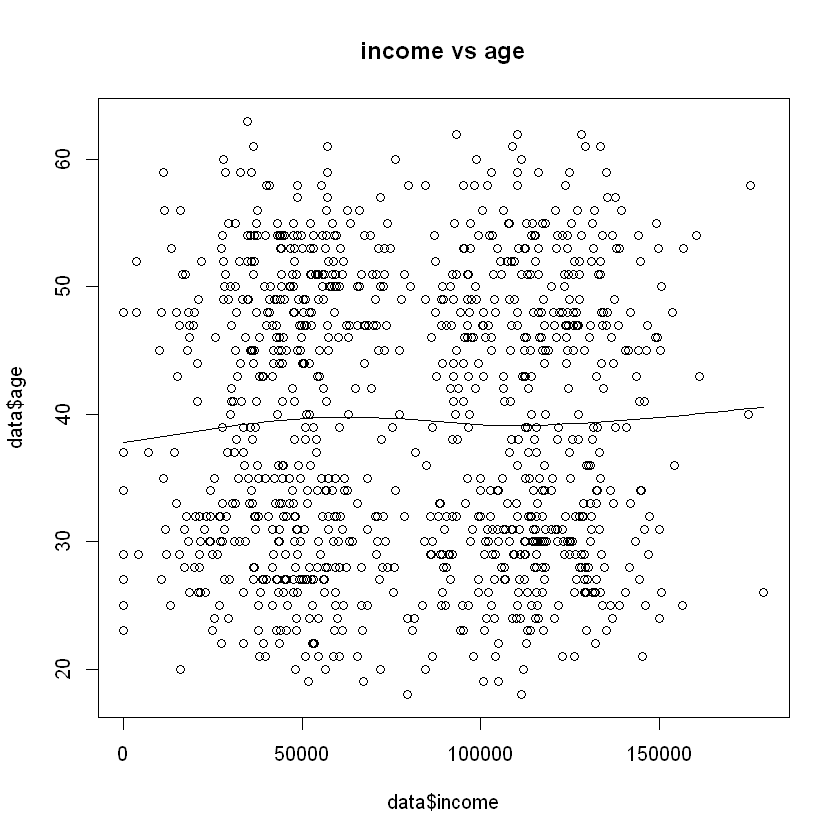

In [11]:
# Vẽ hình để xem xét mối liên hệ giữa các thuộc tính. Cho nhận xét dựa trên biểu đồ.
cor(data$income, data$age)

# Vẽ biểu đồ quan sát mối liên hệ giữa sales và youtube
scatter.smooth(x=data$income, y = data$age,
               main = 'income vs age')

- Nhận xét: không có sự liên hệ giữa Age và Income

In [12]:
# Xây dựng model từ dữ liệu income và age.
wss <- (nrow(data)-1) * sum(apply(data[,1:2], 2, var))
for (i in 1:10) wss[i] <- sum(kmeans(data[, 1:2],
                                    centers = i,
                                    nstart = 20)$withinss)

In [13]:
wss

[1] 1.539990e+12 2.949515e+11 1.829886e+11 1.035845e+11 7.322054e+10
 [6] 5.191563e+10 3.998635e+10 2.931591e+10 2.330456e+10 1.919358e+10

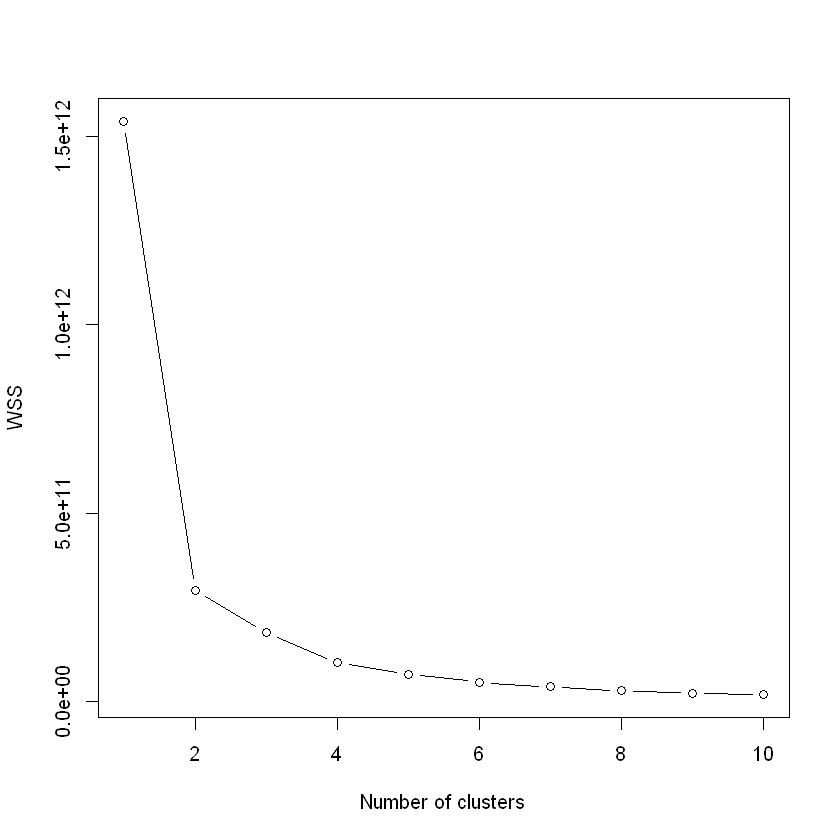

In [14]:
plot(1:10, wss, type = 'b',
     xlab = 'Number of clusters',
     ylab = 'WSS')

- Chọn best k = 4

In [15]:
# Tìm kết quả => có bao nhiêu cụm => mẫu nào thuộc cụm nào?
set.seed(20)
dataCluster <- kmeans(data[, 1:2], centers = 4, nstart = 20)
print(dataCluster)

K-means clustering with 4 clusters of sizes 300, 197, 196, 307

Cluster means:
     income      age
1 104182.84 38.66000
2 133021.91 40.02030
3  28072.64 39.31122
4  55877.56 39.81433

Clustering vector:
   [1] 1 4 3 3 4 3 4 1 3 4 3 4 4 1 2 4 1 1 3 4 3 1 1 1 4 1 1 3 1 2 4 4 3 1 1 1 4
  [38] 4 4 1 4 4 2 1 1 2 2 2 2 4 1 4 1 3 3 3 3 4 2 4 2 3 1 2 4 2 4 2 2 2 4 1 1 1
  [75] 4 4 3 1 2 1 2 4 1 3 1 3 4 3 4 1 3 3 4 1 4 4 1 4 3 4 3 1 4 2 4 4 1 3 3 4 4
 [112] 1 1 3 2 4 1 2 4 3 2 4 1 4 3 4 2 3 4 1 2 4 4 2 1 4 2 4 2 3 3 3 3 1 3 1 1 1
 [149] 2 4 1 4 2 4 3 4 1 3 1 1 2 2 1 1 2 4 3 2 2 4 1 4 1 1 4 4 1 1 1 2 4 4 1 3 2
 [186] 2 1 1 1 2 1 4 3 4 4 4 2 1 2 4 1 4 3 4 4 1 1 3 3 4 4 4 1 2 4 4 1 4 2 3 1 1
 [223] 3 2 1 2 4 4 4 1 2 4 1 2 4 2 4 2 4 2 2 4 3 1 4 1 1 3 3 1 4 3 3 4 4 4 1 1 2
 [260] 2 1 3 1 1 3 1 2 4 1 4 4 2 4 1 1 2 4 3 2 1 1 2 4 2 2 1 4 4 4 4 4 4 2 2 4 1
 [297] 4 2 1 3 1 3 2 2 3 4 4 2 3 3 1 1 3 4 3 4 2 4 2 4 4 3 2 3 3 3 1 3 3 4 4 3 1
 [334] 2 4 4 3 4 2 1 3 2 2 3 3 3 2 3 3 3 1 4 2 1 1 1 4 2 1 3 1 1 1 

- Nhận xét: Áp dụng bài toán phân vùng này sẽ đạt được between_SS / total_SS =  93.3%

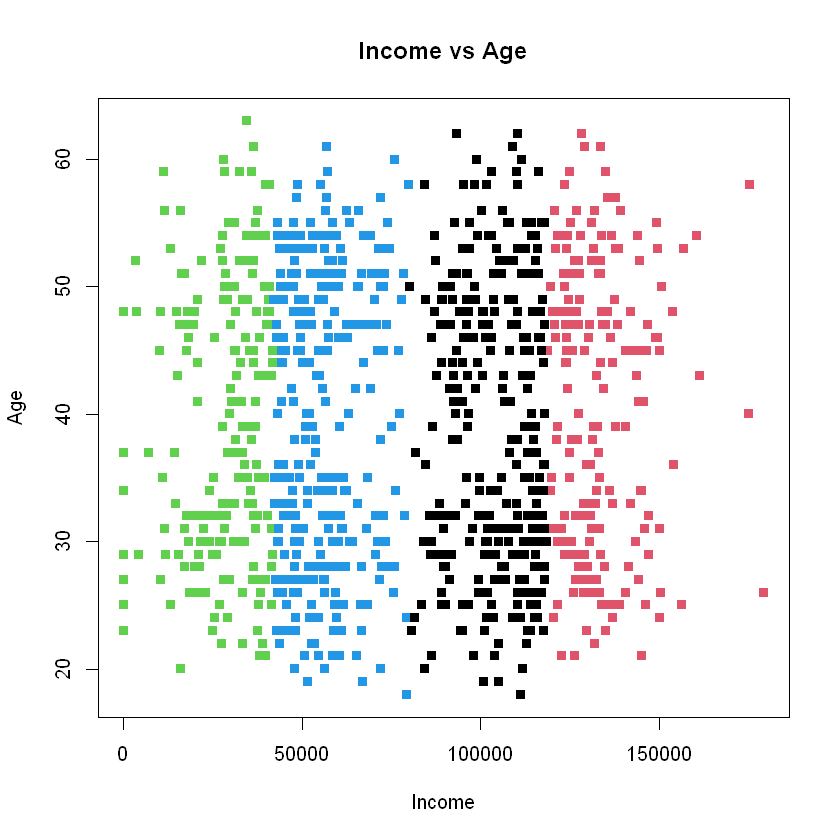

In [16]:
# Vẽ hình (với mỗi cụm là một màu) => xem kết quả.
dataCluster$cluster <- as.factor(dataCluster$cluster)
plot(x = data$income, y = data$age,
     xlab = 'Income',
     ylab = 'Age',
     main = 'Income vs Age', col = dataCluster$cluster, 
     pch = 15)

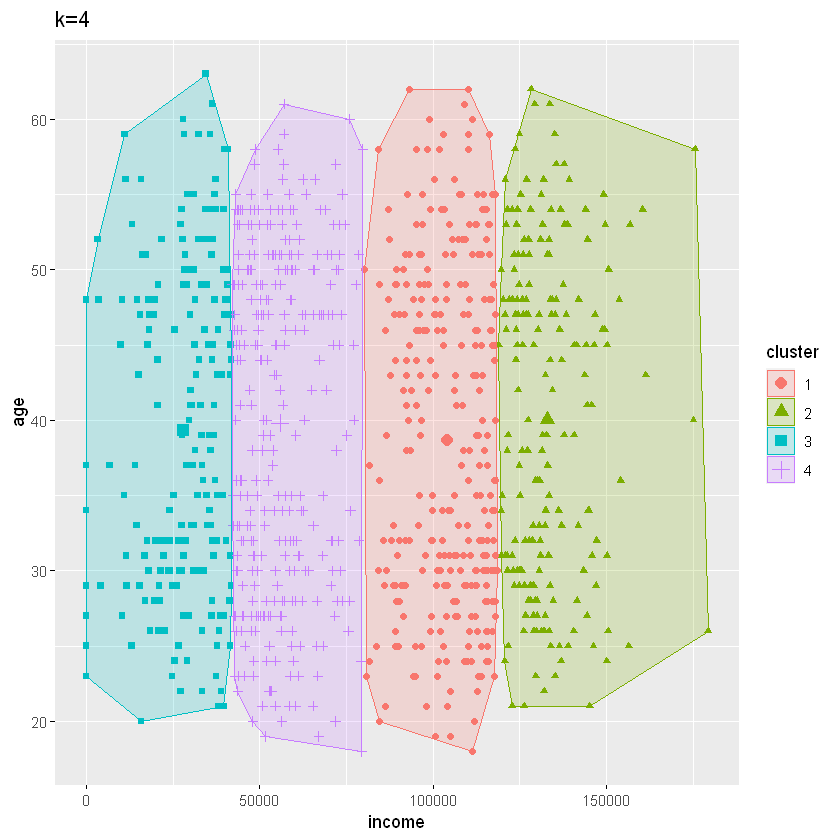

In [17]:
fviz_cluster(dataCluster, geom = 'point', data = data[,1:2], stand=F) +
ggtitle('k=4')

- Nhận xét: có 4 cụm được chia theo income. Cụm 1 từ 0 đến ~40000, cụm 2 từ 40000 đến ~80000, cụm 3 từ 80000 đến ~120000 và cụm 4 là trên 120000